In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []

In [3]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dzhebariki-khaya
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mitsamiouli
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | shenjiamen
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | borovsk
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | abu samrah
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | bud
Processing Record 21 of Set 

Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | zawiercie
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | chilca
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | suba
Processing Record 45 of Set 4 | jega
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 49 of Set 4 | beipiao
Processing Record 50 of Set 4 | la plata
Processing Record 1 of Set 5 | mecca
Processing Record 2 of Set 5 | solnechnyy
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | uspenka
Processing Record 5 of Set 5 | zabid
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | xiaoweizhai
Processing Record 8 of Set 5 | gladstone
Processing Record 9 of Set 5 | kaeo
Processing Record 10 of Set 5 | luanda
Processing 

Processing Record 27 of Set 8 | lasa
Processing Record 28 of Set 8 | canoinhas
Processing Record 29 of Set 8 | kaniama
Processing Record 30 of Set 8 | bredasdorp
Processing Record 31 of Set 8 | lodwar
Processing Record 32 of Set 8 | west bay
Processing Record 33 of Set 8 | hami
Processing Record 34 of Set 8 | banmo
City not found. Skipping...
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | pevek
Processing Record 37 of Set 8 | magadan
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | xunchang
Processing Record 40 of Set 8 | dzierzoniow
Processing Record 41 of Set 8 | sao desiderio
Processing Record 42 of Set 8 | belaya gora
Processing Record 43 of Set 8 | itacare
Processing Record 44 of Set 8 | piacabucu
Processing Record 45 of Set 8 | umm kaddadah
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | wajir
Processing Record 48 of Set 8 | adrar
Processing Record 49 of Set 8 | karaul
City not found.

Processing Record 15 of Set 12 | benguela
Processing Record 16 of Set 12 | intibuca
Processing Record 17 of Set 12 | yantal
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | kasempa
Processing Record 20 of Set 12 | labrea
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | padang
Processing Record 23 of Set 12 | chalus
Processing Record 24 of Set 12 | guider
Processing Record 25 of Set 12 | morant bay
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | algiers
Processing Record 29 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 12 | gondanglegi
Processing Record 31 of Set 12 | meyungs
City not found. Skipping...
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | douentza
Processing Record 34 of Set 12 | mackay
Processing Record 35 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 36 of Set 1

In [7]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dzhebariki-Khaya,RU,2022-08-22 19:05:02,62.2167,135.8000,42.57,93,100,3.87
1,Vaini,TO,2022-08-22 19:05:02,-21.2000,-175.2000,66.36,94,20,4.61
2,Saskylakh,RU,2022-08-22 19:05:03,71.9167,114.0833,40.93,78,82,4.27
3,Rikitea,PF,2022-08-22 19:06:43,-23.1203,-134.9692,69.82,72,22,12.10
4,Mitsamiouli,KM,2022-08-22 19:06:43,-11.3847,43.2844,74.44,77,5,7.27
5,Shenjiamen,CN,2022-08-22 19:05:04,29.9576,122.2980,81.07,91,100,15.03
6,Guerrero Negro,MX,2022-08-22 19:05:05,27.9769,-114.0611,77.68,64,90,12.88
7,Hermanus,ZA,2022-08-22 19:05:08,-34.4187,19.2345,52.81,83,100,10.58
8,Port Alfred,ZA,2022-08-22 19:05:08,-33.5906,26.8910,58.33,75,6,1.07
9,Faanui,PF,2022-08-22 19:05:09,-16.4833,-151.7500,77.41,76,50,16.28


In [2]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
city_data_df = pd.read_csv(output_data_file)

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

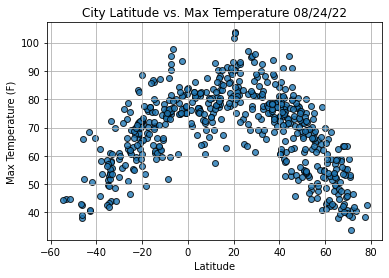

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

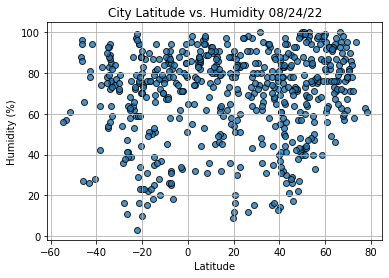

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

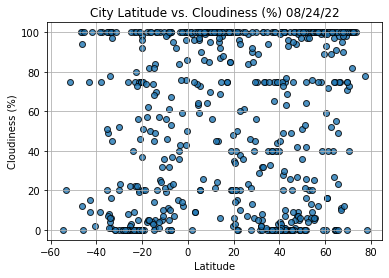

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

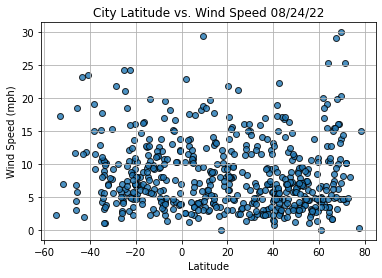

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [12]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

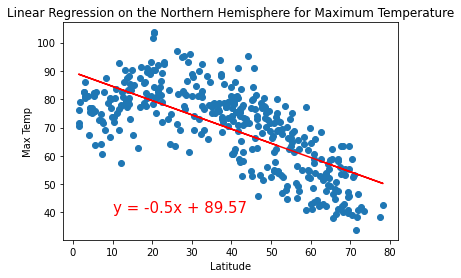

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

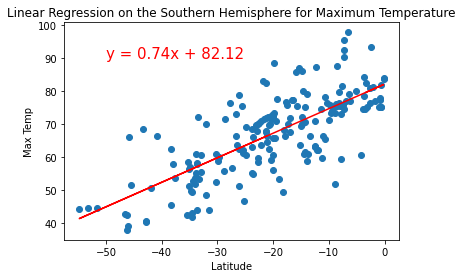

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

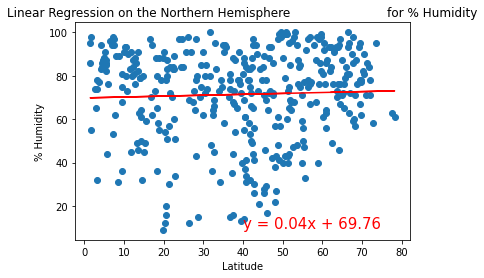

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

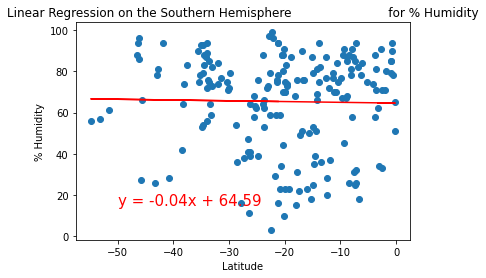

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

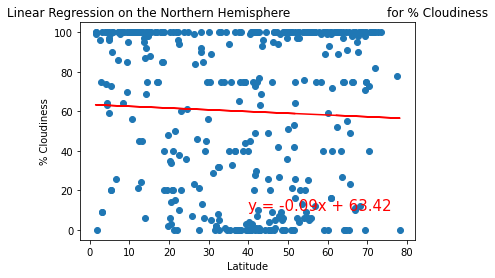

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

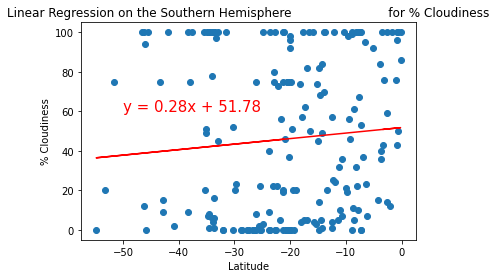

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

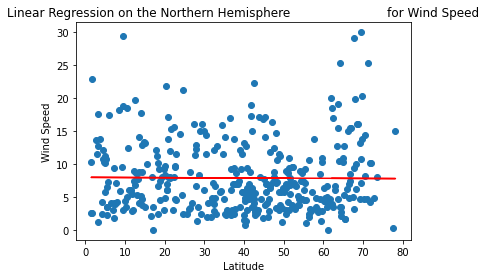

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

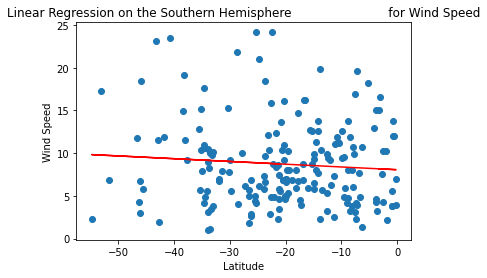

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))